# Mutations distribution


In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from dgrec.utils import parse_genotypes, str_to_mut
from dgrec.example_data import get_example_data_dir
from Bio import SeqIO
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_path=get_example_data_dir()
read_ref_file="sacB_ref.fasta"
ref=next(SeqIO.parse(os.path.join(data_path,read_ref_file),"fasta"))
ref_seq=str(ref.seq)

gen_list=parse_genotypes(os.path.join(data_path,"sacB_genotypes.csv"))

In [ ]:
mutations=[[str_to_mut(gen[0]),gen[1]] for gen in gen_list[1:]]
bases="ATGC"
nN_mut=dict([(b,np.zeros(8)) for b in bases])
for g,n in mutations:
    mutated_bases=np.array(list(zip(*g))[0])
    for b in bases:
        c=np.sum(mutated_bases==b) #number of mutated bases that are adenines
        nN_mut[b][c]+=n

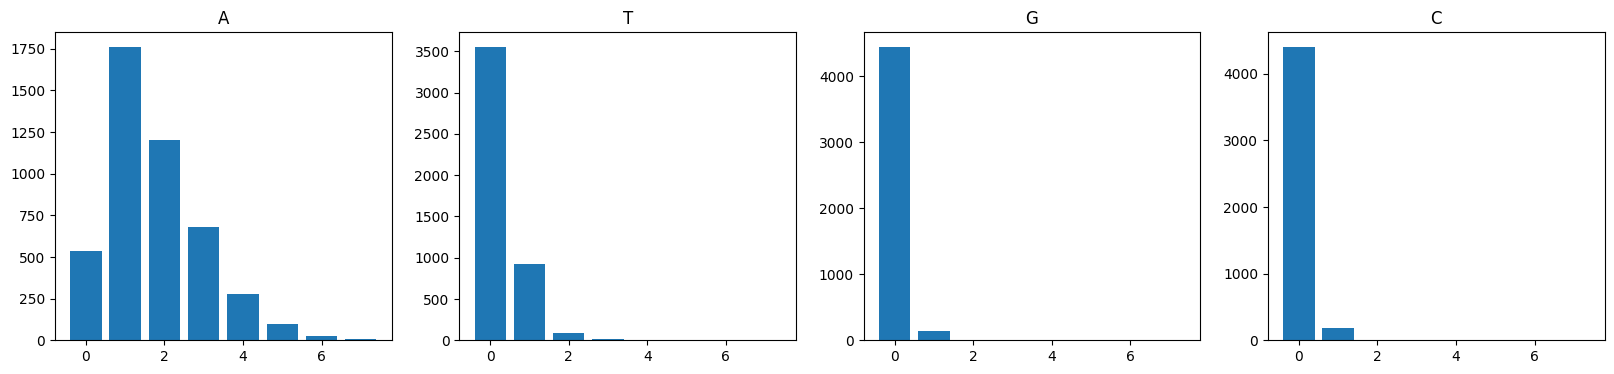

In [ ]:
fig, axes = plt.subplots(1,4,figsize=(20,4))

for i,b in enumerate(bases):
    axes[i].bar(range(8),nN_mut[b])
    axes[i].set_title(b)

plt.show()